In [94]:
%matplotlib inline

In [94]:
# Data
import pandas as pd
import numpy as np

In [144]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [123]:
# Machine learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
	ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [97]:
import platform
if platform.system() == 'Windows':
    import os
    os.chdir('C:/Users/Lordzsolt/_PythonStuff/Kaggle/Titanic')

In [152]:
trainDF = pd.read_csv("input/train.csv")
testDF = pd.read_csv("input/test.csv")
combineDF = pd.concat([trainDF, testDF], axis=0).reset_index(drop=True)
IDtest = testDF['PassengerId']

In [99]:
combineDF = combineDF.fillna(np.nan)
nulls = combineDF.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]

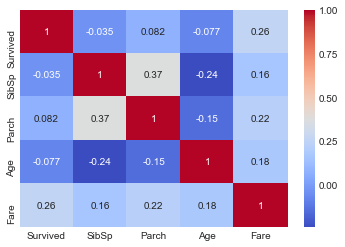

In [100]:
sns.heatmap(combineDF[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, cmap='coolwarm')

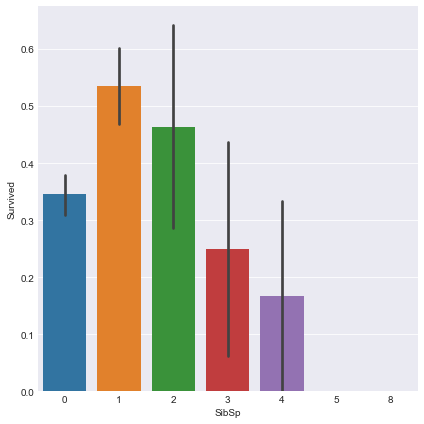

In [101]:
sns.factorplot(x='SibSp', y='Survived', data=combineDF, kind='bar', size=6)

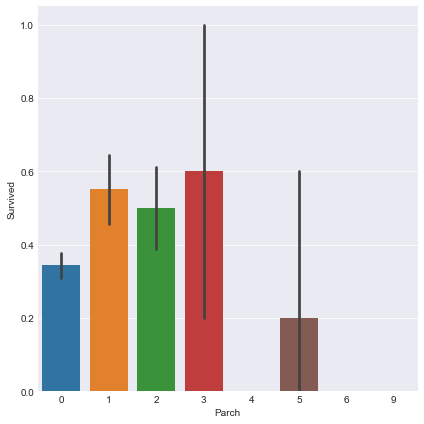

In [102]:
sns.factorplot(x='Parch', y='Survived', data=combineDF, kind='bar', size=6)

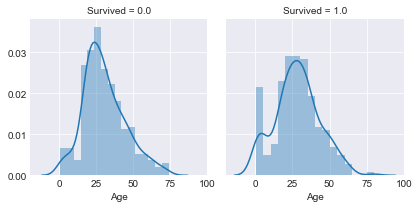

In [103]:
g = sns.FacetGrid(combineDF, col='Survived')
g = g.map(sns.distplot, "Age")

In [104]:
combineDF['Fare'] = combineDF['Fare'].fillna(combineDF['Fare'].median())

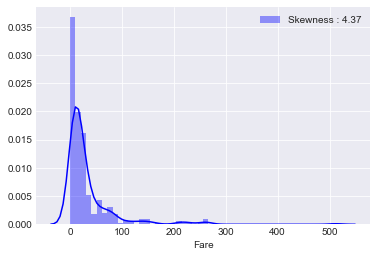

In [105]:
fares = combineDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

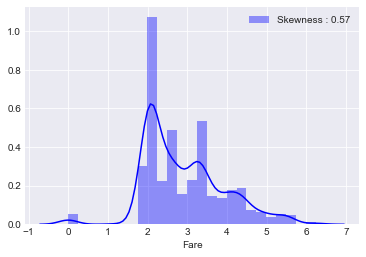

In [106]:
combineDF['Fare'] = fares.map(lambda x: np.log(x) if x > 0 else 0)

fares = combineDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

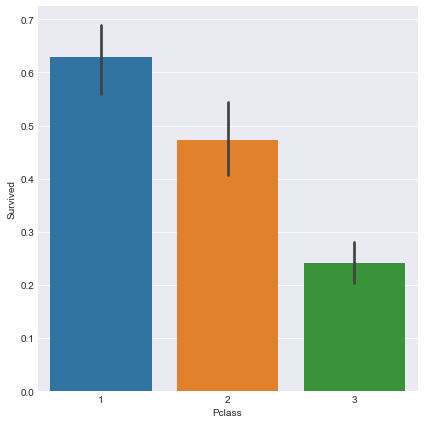

In [107]:
sns.factorplot(x='Pclass', y='Survived', data=combineDF, kind="bar", size=6)

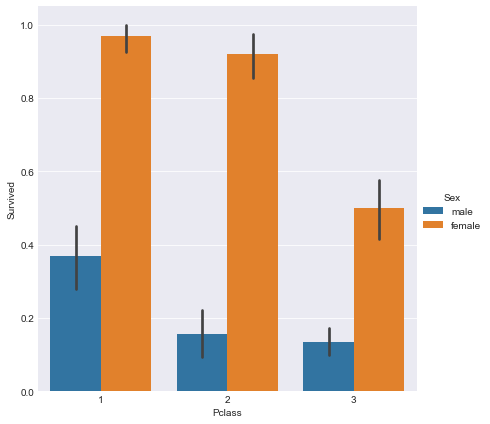

In [108]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=combineDF, kind="bar", size=6)

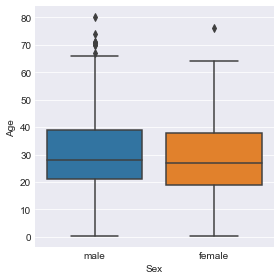

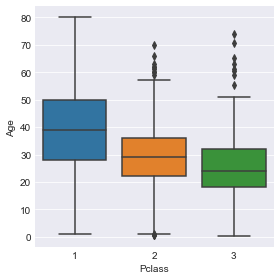

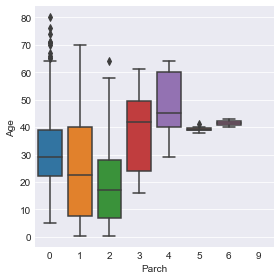

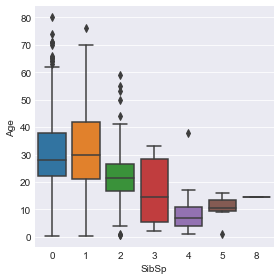

In [109]:
g = sns.factorplot(y='Age', x='Sex', data=combineDF, kind="box")
g = sns.factorplot(y='Age', x='Pclass', data=combineDF, kind="box")
g = sns.factorplot(y='Age', x='Parch', data=combineDF, kind="box")
g = sns.factorplot(y='Age', x='SibSp', data=combineDF, kind="box")

In [110]:
combineDF['Sex'] = combineDF['Sex'].map({'male': 0, 'female': 1})
combineDF.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


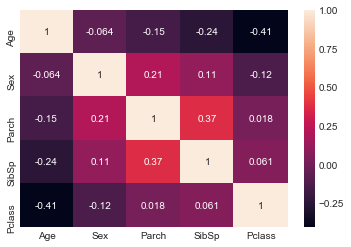

In [111]:
sns.heatmap(combineDF[['Age', 'Sex', 'Parch', 'SibSp', 'Pclass']].corr(), annot=True)

In [112]:
# Pclass, SibSp, Parch
pclasses = set(combineDF['Pclass'])
sibsps = set(combineDF['SibSp'])
parchs = set(combineDF['Parch'])

median = combineDF['Age'].median()

groupMedian = {}

for pclass in pclasses:
    groupMedian[pclass] = {}
    for sibsp in sibsps:
        groupMedian[pclass][sibsp] = {}
        for parch in parchs:
            currentMedian = combineDF['Age'][((combineDF['Pclass'] == pclass) & (combineDF['SibSp'] == sibsp) & (combineDF['Parch'] == parch))].median()
            if not np.isnan(currentMedian):
                groupMedian[pclass][sibsp][parch] = currentMedian
            else:
                groupMedian[pclass][sibsp][parch] = median
            
missingAges = list(combineDF['Age'][combineDF['Age'].isnull()].index)
for index in missingAges:
    combineDF.loc[index, 'Age'] = groupMedian[combineDF['Pclass'][index]][combineDF['SibSp'][index]][combineDF['Parch'][index]]

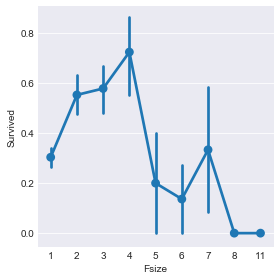

In [113]:
combineDF['Fsize'] = combineDF['SibSp'] + combineDF['Parch'] + 1
sns.factorplot(x='Fsize', y='Survived', data=combineDF)

In [114]:
combineDF = pd.get_dummies(combineDF, columns=['Pclass'], prefix='Pc')
combineDF = pd.get_dummies(combineDF, columns=['Embarked'], prefix='Emb')

In [115]:
combineDF.drop(labels=['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace = True)

In [116]:
combineDF.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Pc_1,Pc_2,Pc_3,Emb_C,Emb_Q,Emb_S
0,22.0,1.981001,0,0,1,0.0,2,0,0,1,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,1,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,0,0,1,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,1,0,0,0,0,1
4,35.0,2.085672,0,0,0,0.0,1,0,0,1,0,0,1


In [117]:
train_len = len(trainDF)
train = combineDF.loc[:train_len - 1].copy()
test = combineDF.loc[train_len:].copy()

test.drop(labels=['Survived'], axis = 1, inplace = True)

In [118]:
train['Survived']

train['Survived'] = train['Survived'].astype(int)
Y_train = train['Survived']
X_train = train.drop(labels = ['Survived'], axis = 1)

AttributeError: Unknown property figsize

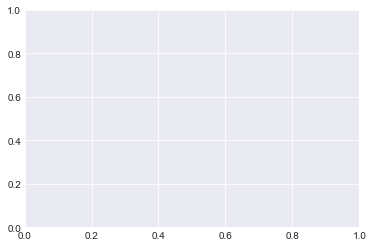

In [127]:
kfold = StratifiedKFold(n_splits=10)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy',  cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors':
	cv_std,'Algorithm':['SVC', 'DecisionTree', 'AdaBoost', 'RandomForest', 'ExtraTrees',
                        'GradientBoosting', 'MultipleLayerPerceptron', 'KNeighboors', 'LogisticRegression']})

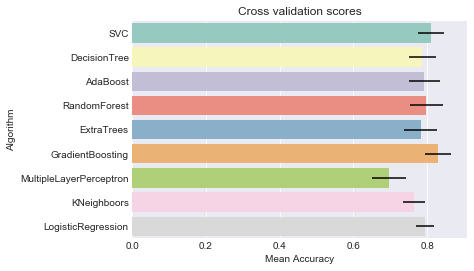

In [133]:
g = sns.barplot('CrossValMeans', 'Algorithm', data = cv_res, palette='Set3', orient = 'h', **{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

In [135]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1, 2],
              "learning_rate":  [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.2, 0.3, 1.0, 1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 2, verbose = 1)
gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 176 candidates, totalling 1760 fits


[Parallel(n_jobs=2)]: Done 1760 out of 1760 | elapsed:    7.2s finished


0.80471380471380471

In [137]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs=2, verbose=1)
gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.4s


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   30.7s


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min


[Parallel(n_jobs=2)]: Done 540 out of 540 | elapsed:  1.4min finished


0.83164983164983164

In [138]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=2, verbose=1)
gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.9s


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   31.9s


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.3min


[Parallel(n_jobs=2)]: Done 540 out of 540 | elapsed:  1.7min finished


0.82940516273849607

In [139]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s


[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   14.5s


[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   29.6s finished


0.81930415263748602

In [140]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 2, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.1s


[Parallel(n_jobs=2)]: Done 280 out of 280 | elapsed:   34.7s finished


0.82828282828282829

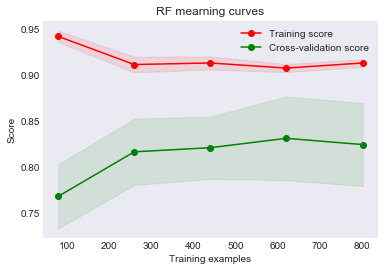

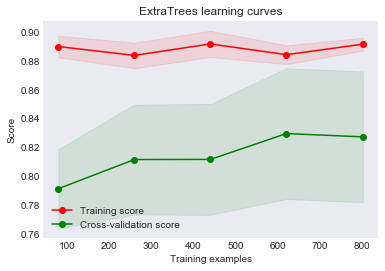

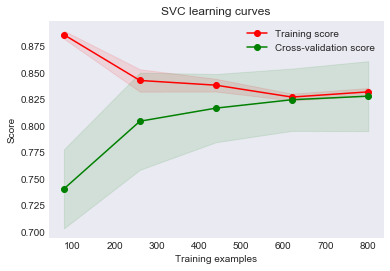

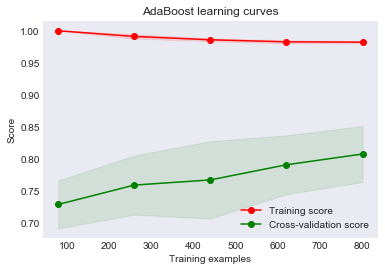

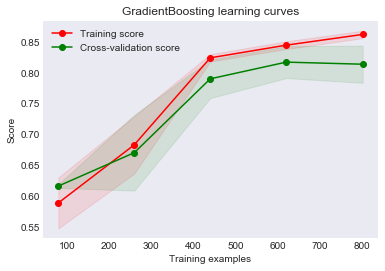

In [145]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

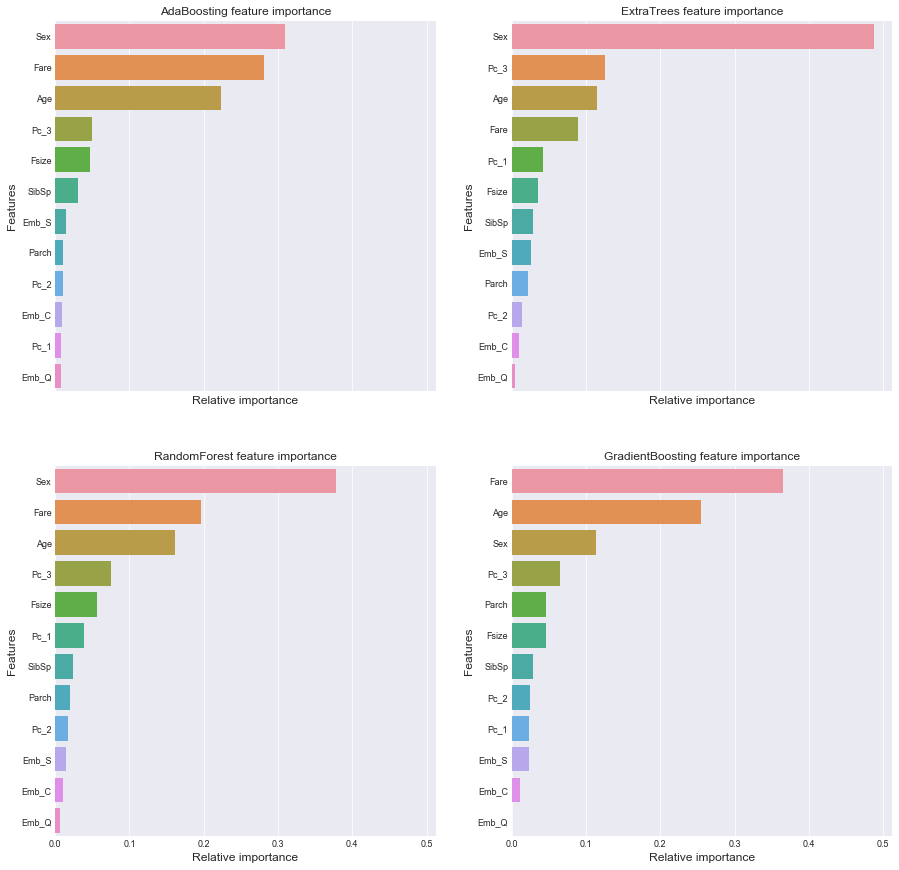

In [146]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

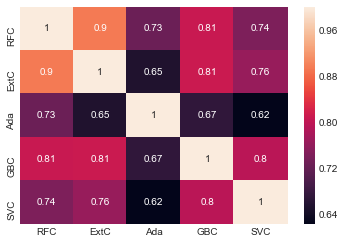

In [147]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [148]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [153]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest, test_Survived], axis=1)
results.to_csv("output/submission_ensemble.csv", index=False)